### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
np.random.seed(7)

### Define file path

In [2]:
path = "/Users/sohinimitra/Documents/epiFi/"

### Load data and observe samples

In [3]:
data_applicant = pd.read_csv(path+"Data/applicant.csv")
data_loan = pd.read_csv(path+"Data/loan.csv")

In [4]:
print("Applicant data information", data_applicant.info())
data_applicant.sample(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
applicant_id                                                1000 non-null int64
Primary_applicant_age_in_years                              1000 non-null int64
Gender                                                      1000 non-null object
Marital_status                                              1000 non-null object
Number_of_dependents                                        1000 non-null int64
Housing                                                     1000 non-null object
Years_at_current_residence                                  1000 non-null int64
Employment_status                                           1000 non-null object
Has_been_employed_for_at_least                              938 non-null object
Has_been_employed_for_at_most                               747 non-null object
Telephone                                                   404 non-null object
Foreign_wo

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
778,1185509,38,male,single,1,own,2,management / self-employed / highly qualified ...,7 years,NaN,Registered under the applicant's name,1,Very high,NaN,NaN
334,1749671,23,male,single,2,rent,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,0
271,1753115,37,female,divorced/separated/married,1,rent,4,skilled employee / official,4 years,7 years,Registered under the applicant's name,1,High,NaN,NaN
802,1867602,24,female,divorced/separated/married,1,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,0
216,1671701,31,male,single,1,own,1,skilled employee / official,4 years,7 years,Registered under the applicant's name,1,Low,NaN,0
408,1755656,26,male,divorced/separated,1,own,2,management / self-employed / highly qualified ...,7 years,NaN,Registered under the applicant's name,1,High,NaN,NaN
812,1434140,24,male,single,1,own,4,skilled employee / official,4 years,7 years,Registered under the applicant's name,1,Low,NaN,0


In [5]:
print("Loan data information", data_loan.info())
data_loan.sample(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
loan_application_id                            1000 non-null object
applicant_id                                   1000 non-null int64
Months_loan_taken_for                          1000 non-null int64
Purpose                                        988 non-null object
Principal_loan_amount                          1000 non-null int64
EMI_rate_in_percentage_of_disposable_income    1000 non-null int64
Property                                       846 non-null object
Has_coapplicant                                1000 non-null int64
Has_guarantor                                  1000 non-null int64
Other_EMI_plans                                186 non-null object
Number_of_existing_loans_at_this_bank          1000 non-null int64
Loan_history                                   1000 non-null object
high_risk_applicant                            1000 non-null int64
dtypes: int64(8), obj

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
562,d68ed0f6-edad-11ea-a40a-2a4722f3be9e,1892811,6,electronic equipment,683000,2,building society savings agreement/life insurance,0,0,bank,1,delay in paying off loans in the past,0
11,d68d9e66-edad-11ea-a00e-08a9b825002d,1818043,48,business,4308000,3,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,1
731,d68f2d6c-edad-11ea-acb8-4a6bf2529aff,1892474,24,electronic equipment,1987000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
106,d68dd14c-edad-11ea-9e7c-0fab01ac5e54,1645589,18,new vehicle,6458000,2,NaN,0,0,bank,2,all loans at this bank paid back duly,1
234,d68e156c-edad-11ea-a877-347e6a1e2ea7,1570458,4,electronic equipment,1544000,2,real estate,0,0,NaN,3,critical/pending loans at other banks,0
706,d68f2092-edad-11ea-9e4f-1b91a31266c6,1735719,48,new vehicle,6560000,3,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,1
974,d68fb0de-edad-11ea-9336-32bd42489178,1386565,30,electronic equipment,2831000,4,car or other,0,0,NaN,1,critical/pending loans at other banks,0


### Drop columns with high number (more than 55%) of missing data

In [6]:
data_applicant_2 = data_applicant.drop(['Telephone', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)'], axis=1)
data_loan_2 = data_loan.drop('Other_EMI_plans', axis=1)

### Obtain data for EDA

In [7]:
data_all = pd.merge(data_applicant_2, data_loan_2, on="applicant_id", how="inner")
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
applicant_id                                   1000 non-null int64
Primary_applicant_age_in_years                 1000 non-null int64
Gender                                         1000 non-null object
Marital_status                                 1000 non-null object
Number_of_dependents                           1000 non-null int64
Housing                                        1000 non-null object
Years_at_current_residence                     1000 non-null int64
Employment_status                              1000 non-null object
Has_been_employed_for_at_least                 938 non-null object
Has_been_employed_for_at_most                  747 non-null object
Foreign_worker                                 1000 non-null int64
Savings_account_balance                        817 non-null object
loan_application_id                            1000 non-null object
Months_loan_taken_

### Check class balance

Text(0, 0.5, 'Total number of examples')

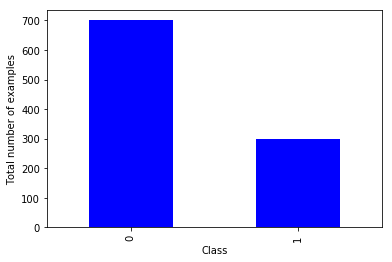

In [8]:
data_all["high_risk_applicant"].value_counts().plot.bar(color="blue")
plt.xlabel("Class")
plt.ylabel("Total number of examples")

#### Observation: High risk class 1 has fewer examples. Class imbalance exists in the dataset of 1000 examples.

### EDA 1: Effect of age on risk

In [9]:
data_age_vs_risk = data_all[["Primary_applicant_age_in_years","high_risk_applicant"]]
data_age_vs_risk["Primary_applicant_age_in_years"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Primary_applicant_age_in_years, dtype: float64

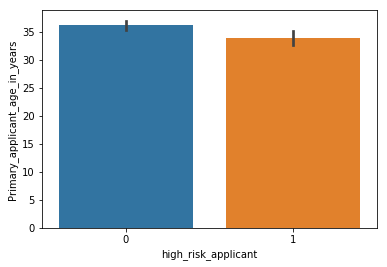

In [10]:
sns.barplot(x='high_risk_applicant', y='Primary_applicant_age_in_years',data=data_age_vs_risk)

#### Observation: On an average, younger applicants are in the high risk class (1) compared to the low risk class (0).

In [11]:
data_age_vs_risk_class0 = data_age_vs_risk.loc[data_age_vs_risk["high_risk_applicant"]==0]
data_age_vs_risk_class0["Primary_applicant_age_in_years"].describe()

count    700.000000
mean      36.224286
std       11.381145
min       19.000000
25%       27.000000
50%       34.000000
75%       42.250000
max       75.000000
Name: Primary_applicant_age_in_years, dtype: float64

In [12]:
data_age_vs_risk_class1 = data_age_vs_risk.loc[data_age_vs_risk["high_risk_applicant"]==1]
data_age_vs_risk_class1["Primary_applicant_age_in_years"].describe()

count    300.000000
mean      33.963333
std       11.222379
min       19.000000
25%       25.000000
50%       31.000000
75%       40.000000
max       74.000000
Name: Primary_applicant_age_in_years, dtype: float64

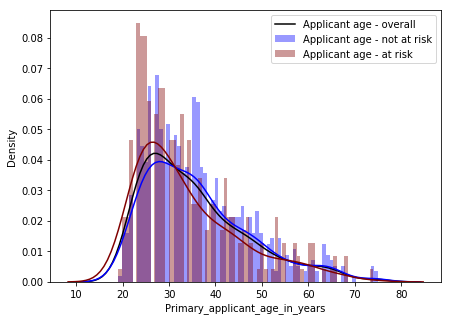

In [13]:
plt.figure(figsize=(7,5))
sns.distplot(data_age_vs_risk["Primary_applicant_age_in_years"], bins=70, color="black",hist=False, label="Applicant age - overall")
sns.distplot(data_age_vs_risk_class0["Primary_applicant_age_in_years"],bins=70, color="blue", label="Applicant age - not at risk")
sns.distplot(data_age_vs_risk_class1["Primary_applicant_age_in_years"],bins=70, color="maroon", label="Applicant age - at risk")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Observation: The histogram shows that applicants in lower age groups [~23 to 27 years] belong to high risk class (1) more. As the age group increases, 'blue' line (applicants in low risk class (0)) is higher than the 'red' line (applicants in high risk class (1)). Therefore, age has an impact on the output.

### EDA 2 - Effect of gender on risk

In [14]:
data_gender_vs_risk = data_all[["Gender","high_risk_applicant"]]
data_gender_vs_risk["Gender"].value_counts()

male      690
female    310
Name: Gender, dtype: int64

In [15]:
data_gender_vs_risk_class0 = data_gender_vs_risk.loc[data_gender_vs_risk["high_risk_applicant"]==0]
data_gender_vs_risk_class0["Gender"].value_counts()

male      499
female    201
Name: Gender, dtype: int64

In [16]:
data_gender_vs_risk_class1 = data_gender_vs_risk.loc[data_gender_vs_risk["high_risk_applicant"]==1]
data_gender_vs_risk_class1["Gender"].value_counts()

male      191
female    109
Name: Gender, dtype: int64

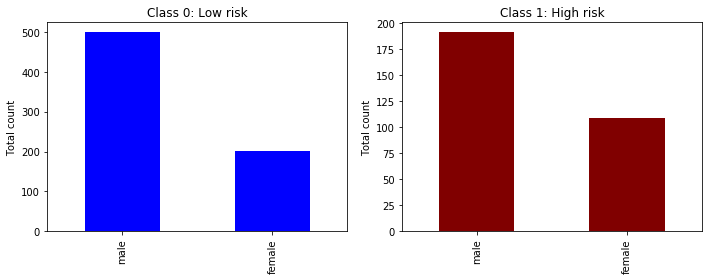

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
data_gender_vs_risk_class0["Gender"].value_counts().plot.bar(color="blue")
plt.ylabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_gender_vs_risk_class1["Gender"].value_counts().plot.bar(color="maroon")
plt.ylabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: In class 0 (i.e. low risk), there are 499 (499/690 ~ 72% of the male applicants) male applicants and 201 (201/310 ~ 65% of the female applicants) female applicants. In class 1 (i.e. high risk), there are 191 (191/690 ~27% of the male applicants) male applicants and 109 (109/310 ~ 35% of the female applicants) female applicants. If the applicant is female, the chances of being in class 1 is more (35% vs 27%). Therefore, gender impacts the output.

### EDA 3 - Effect of marital status on risk

In [18]:
data_marital_vs_risk = data_all[["Marital_status","high_risk_applicant"]]
data_marital_vs_risk["Marital_status"].value_counts()

single                        548
divorced/separated/married    310
married/widowed                92
divorced/separated             50
Name: Marital_status, dtype: int64

#### Observation: This data is ambiguous. The different marital statuses overlap.

### EDA 4 - Effect of number of dependents on risk

In [19]:
data_dependent_vs_risk = data_all[["Number_of_dependents","high_risk_applicant"]]
print("Number of dependents -\n",data_dependent_vs_risk["Number_of_dependents"].value_counts())
print("Number of dependents summary -\n",data_dependent_vs_risk["Number_of_dependents"].describe())

Number of dependents -
 1    845
2    155
Name: Number_of_dependents, dtype: int64
Number of dependents summary -
 count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Number_of_dependents, dtype: float64


#### Observation: Majority of the values in this column is '1'. The variance/standard deviation is very low. Therefore, the output will not be influenced by this column.

### EDA 5 - Effect of housing on risk

In [20]:
data_housing_vs_risk = data_all[["Housing","high_risk_applicant"]]
data_housing_vs_risk["Housing"].value_counts()

own         713
rent        179
for free    108
Name: Housing, dtype: int64

In [21]:
data_housing_vs_risk_class0 = data_housing_vs_risk.loc[data_housing_vs_risk["high_risk_applicant"]==0]
data_housing_vs_risk_class0["Housing"].value_counts()

own         527
rent        109
for free     64
Name: Housing, dtype: int64

In [22]:
data_housing_vs_risk_class1 = data_housing_vs_risk.loc[data_housing_vs_risk["high_risk_applicant"]==1]
data_housing_vs_risk_class1["Housing"].value_counts()

own         186
rent         70
for free     44
Name: Housing, dtype: int64

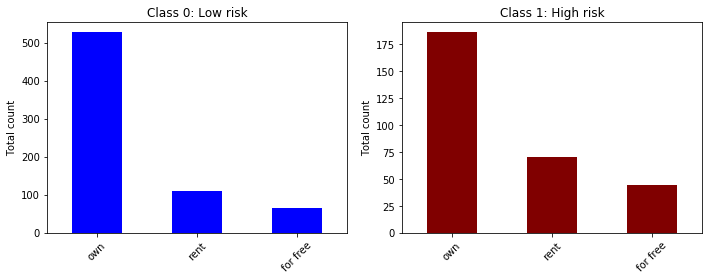

In [23]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
data_housing_vs_risk_class0["Housing"].value_counts().plot.bar(color="blue", rot=45)
plt.ylabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_housing_vs_risk_class1["Housing"].value_counts().plot.bar(color="maroon", rot=45)
plt.ylabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: Applicants in high risk class (1) are 186 (186/713 ~ 26% of house owners) who own a house;  70 (70/179 ~ 39% of renters) who are renting; 44 (44/108 ~ 40% of who stay for free) who stay for free. House owners are at lower credit risk. Housing choice may impact the output. 

### EDA 6 - Effect of number of years at current residence on risk

In [24]:
data_residence_vs_risk = data_all[["Years_at_current_residence","high_risk_applicant"]]
data_residence_vs_risk["Years_at_current_residence"].describe()

count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Years_at_current_residence, dtype: float64

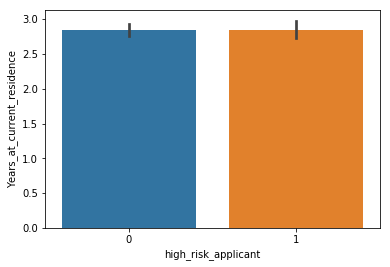

In [25]:
sns.barplot(x='high_risk_applicant', y='Years_at_current_residence',data=data_residence_vs_risk)

In [26]:
data_residence_vs_risk_class0 = data_residence_vs_risk.loc[data_residence_vs_risk["high_risk_applicant"]==0]
data_residence_vs_risk_class0["Years_at_current_residence"].describe()

count    700.000000
mean       2.842857
std        1.108373
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Years_at_current_residence, dtype: float64

In [27]:
data_residence_vs_risk_class1 = data_residence_vs_risk.loc[data_residence_vs_risk["high_risk_applicant"]==1]
data_residence_vs_risk_class1["Years_at_current_residence"].describe()

count    300.000000
mean       2.850000
std        1.094605
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Years_at_current_residence, dtype: float64

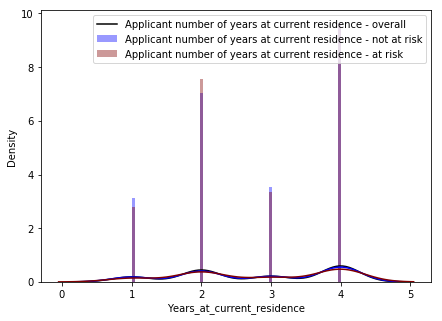

In [28]:
plt.figure(figsize=(7,5))
sns.distplot(data_residence_vs_risk["Years_at_current_residence"], bins=70, color="black",hist=False, label="Applicant number of years at current residence - overall")
sns.distplot(data_residence_vs_risk_class0["Years_at_current_residence"],bins=70, color="blue", label="Applicant number of years at current residence - not at risk")
sns.distplot(data_residence_vs_risk_class1["Years_at_current_residence"],bins=70, color="maroon", label="Applicant number of years at current residence - at risk")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Observation: Variance is very low in this column; On an avergae number of years is same for both the classes, hence may not contribute to learning. 

### EDA 7 - Effect of employment status on risk

In [29]:
data_employment_vs_risk = data_all[["Employment_status","high_risk_applicant"]]
data_employment_vs_risk["Employment_status"].value_counts()

skilled employee / official                                         630
unskilled - resident                                                200
management / self-employed / highly qualified employee / officer    148
unemployed / unskilled - non-resident                                22
Name: Employment_status, dtype: int64

In [30]:
data_employment_vs_risk_class0 = data_employment_vs_risk.loc[data_employment_vs_risk["high_risk_applicant"]==0]
data_employment_vs_risk_class0["Employment_status"].value_counts()

skilled employee / official                                         444
unskilled - resident                                                144
management / self-employed / highly qualified employee / officer     97
unemployed / unskilled - non-resident                                15
Name: Employment_status, dtype: int64

In [31]:
data_employment_vs_risk_class1 = data_employment_vs_risk.loc[data_employment_vs_risk["high_risk_applicant"]==1]
data_employment_vs_risk_class1["Employment_status"].value_counts()

skilled employee / official                                         186
unskilled - resident                                                 56
management / self-employed / highly qualified employee / officer     51
unemployed / unskilled - non-resident                                 7
Name: Employment_status, dtype: int64

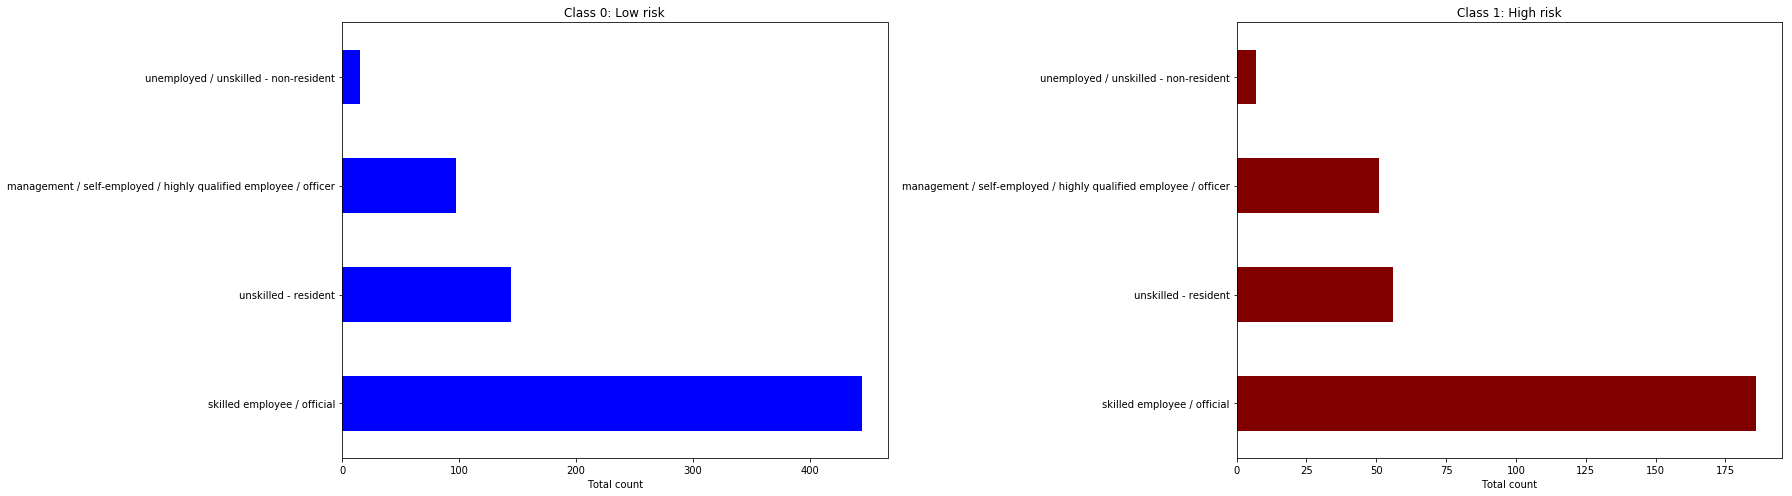

In [32]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
data_employment_vs_risk_class0["Employment_status"].value_counts().plot.barh(color="blue")
plt.xlabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_employment_vs_risk_class1["Employment_status"].value_counts().plot.barh(color="maroon")
plt.xlabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: It can be seen close to ~ +/-30% applicants from each group are in high risk class. Employment status has an impact on the target variable.

### EDA 8 - Effect of Has_been_employed_for_at_least on risk

In [33]:
data_leastEmp_vs_risk = data_all[["Has_been_employed_for_at_least","high_risk_applicant"]]
data_leastEmp_vs_risk["Has_been_employed_for_at_least"].value_counts()

1 year     339
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64

In [34]:
data_leastEmp_vs_risk_class0 = data_leastEmp_vs_risk.loc[data_leastEmp_vs_risk["high_risk_applicant"]==0]
data_leastEmp_vs_risk_class0["Has_been_employed_for_at_least"].value_counts()

1 year     235
7 years    189
4 years    135
0 year     102
Name: Has_been_employed_for_at_least, dtype: int64

In [35]:
data_leastEmp_vs_risk_class1 = data_leastEmp_vs_risk.loc[data_leastEmp_vs_risk["high_risk_applicant"]==1]
data_leastEmp_vs_risk_class1["Has_been_employed_for_at_least"].value_counts()

1 year     104
0 year      70
7 years     64
4 years     39
Name: Has_been_employed_for_at_least, dtype: int64

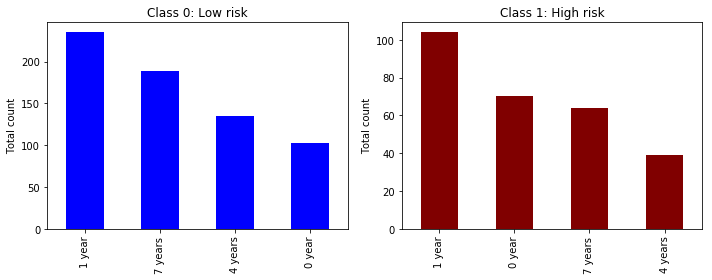

In [36]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
data_leastEmp_vs_risk_class0["Has_been_employed_for_at_least"].value_counts().plot.bar(color="blue")
plt.ylabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_leastEmp_vs_risk_class1["Has_been_employed_for_at_least"].value_counts().plot.bar(color="maroon")
plt.ylabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: There are NULL values in this column. 

### EDA 9 - Effect of Has_been_employed_for_at_most on risk

In [37]:
data_mostEmp_vs_risk = data_all[["Has_been_employed_for_at_most","high_risk_applicant"]]
data_mostEmp_vs_risk["Has_been_employed_for_at_most"].value_counts()

4 years    339
7 years    174
1 year     172
0 year      62
Name: Has_been_employed_for_at_most, dtype: int64

In [38]:
data_mostEmp_vs_risk_class0 = data_mostEmp_vs_risk.loc[data_mostEmp_vs_risk["high_risk_applicant"]==0]
data_mostEmp_vs_risk_class0["Has_been_employed_for_at_most"].value_counts()

4 years    235
7 years    135
1 year     102
0 year      39
Name: Has_been_employed_for_at_most, dtype: int64

In [39]:
data_mostEmp_vs_risk_class1 = data_mostEmp_vs_risk.loc[data_mostEmp_vs_risk["high_risk_applicant"]==1]
data_mostEmp_vs_risk_class1["Has_been_employed_for_at_most"].value_counts()

4 years    104
1 year      70
7 years     39
0 year      23
Name: Has_been_employed_for_at_most, dtype: int64

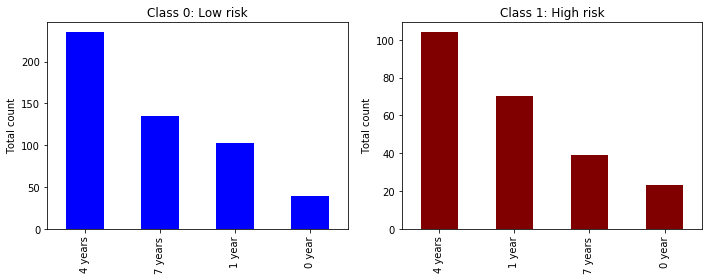

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
data_mostEmp_vs_risk_class0["Has_been_employed_for_at_most"].value_counts().plot.bar(color="blue")
plt.ylabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_mostEmp_vs_risk_class1["Has_been_employed_for_at_most"].value_counts().plot.bar(color="maroon")
plt.ylabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: This column has NULL values.

### EDA 10 - Effect of Foreign worker on risk

In [41]:
data_FW_vs_risk = data_all[["Foreign_worker","high_risk_applicant"]]
data_FW_vs_risk["Foreign_worker"].value_counts()

1    963
0     37
Name: Foreign_worker, dtype: int64

#### Observation: This column has very low variance/standard deviation. 96% of the values are same. This will not impact the target variable.

### EDA 11 - Effect of savings account balance on risk

In [42]:
data_savings_vs_risk = data_all[["Savings_account_balance","high_risk_applicant"]]
data_savings_vs_risk["Savings_account_balance"].value_counts()

Low          603
Medium       103
High          63
Very high     48
Name: Savings_account_balance, dtype: int64

In [43]:
data_savings_vs_risk_class0 = data_savings_vs_risk.loc[data_savings_vs_risk["high_risk_applicant"]==0]
data_savings_vs_risk_class0["Savings_account_balance"].value_counts()

Low          386
Medium        69
High          52
Very high     42
Name: Savings_account_balance, dtype: int64

In [44]:
data_savings_vs_risk_class1 = data_savings_vs_risk.loc[data_savings_vs_risk["high_risk_applicant"]==1]
data_savings_vs_risk_class1["Savings_account_balance"].value_counts()

Low          217
Medium        34
High          11
Very high      6
Name: Savings_account_balance, dtype: int64

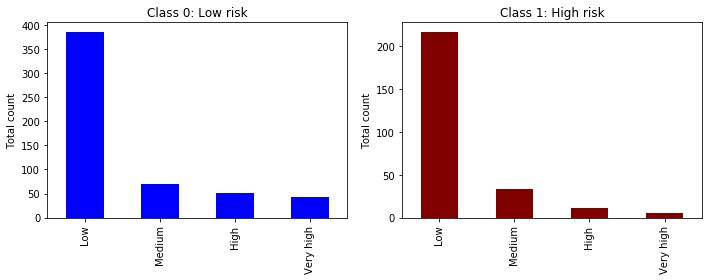

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
data_savings_vs_risk_class0["Savings_account_balance"].value_counts().plot.bar(color="blue")
plt.ylabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_savings_vs_risk_class1["Savings_account_balance"].value_counts().plot.bar(color="maroon")
plt.ylabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: 36% of the applicants in low salarly group, 33% of applicants in medium salary group, 18% of the applicants in high salary group and 13% of the applicants in very high salary group are in high risk class. Higher the balance, lesser the risk. Therefore, savings account balance impacts being in high or low risk class.

### EDA 12 - Effect of Months_loan_taken_for on risk

In [46]:
data_monthsLoan_vs_risk = data_all[["Months_loan_taken_for","high_risk_applicant"]]
data_monthsLoan_vs_risk["Months_loan_taken_for"].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Months_loan_taken_for, dtype: float64

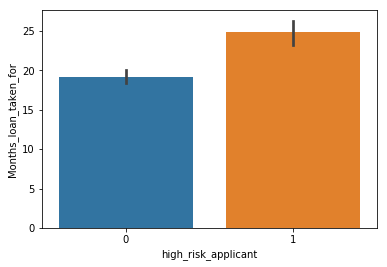

In [47]:
sns.barplot(x='high_risk_applicant', y='Months_loan_taken_for',data=data_monthsLoan_vs_risk)

#### Observation: On an average applicants in high risk class (1) take loans for higher number of months.

In [48]:
data_monthsLoan_vs_risk_class0 = data_monthsLoan_vs_risk.loc[data_monthsLoan_vs_risk["high_risk_applicant"]==0]
data_monthsLoan_vs_risk_class0["Months_loan_taken_for"].describe()

count    700.000000
mean      19.207143
std       11.079564
min        4.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       60.000000
Name: Months_loan_taken_for, dtype: float64

In [49]:
data_monthsLoan_vs_risk_class1 = data_monthsLoan_vs_risk.loc[data_monthsLoan_vs_risk["high_risk_applicant"]==1]
data_monthsLoan_vs_risk_class1["Months_loan_taken_for"].describe()

count    300.000000
mean      24.860000
std       13.282639
min        6.000000
25%       12.000000
50%       24.000000
75%       36.000000
max       72.000000
Name: Months_loan_taken_for, dtype: float64

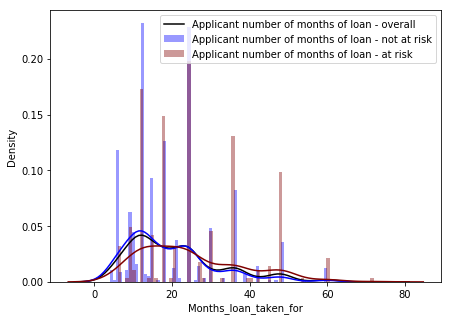

In [50]:
plt.figure(figsize=(7,5))
sns.distplot(data_monthsLoan_vs_risk["Months_loan_taken_for"], bins=70, color="black",hist=False, label="Applicant number of months of loan - overall")
sns.distplot(data_monthsLoan_vs_risk_class0["Months_loan_taken_for"],bins=70, color="blue", label="Applicant number of months of loan - not at risk")
sns.distplot(data_monthsLoan_vs_risk_class1["Months_loan_taken_for"],bins=70, color="maroon", label="Applicant number of months of loan - at risk")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Observation: As number of months for which loan is taken increases, the 'red' curve becomes higher than the 'blue' curve. Therefore, this feature impacts the output.

### EDA 13 - Effect of Purpose on risk

In [51]:
data_purpose_vs_risk = data_all[["Purpose","high_risk_applicant"]]
data_purpose_vs_risk["Purpose"].value_counts()

electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

In [52]:
data_purpose_vs_risk_class0 = data_purpose_vs_risk.loc[data_purpose_vs_risk["high_risk_applicant"]==0]
data_purpose_vs_risk_class0["Purpose"].value_counts()

electronic equipment    218
new vehicle             145
FF&E                    123
used vehicle             86
business                 63
education                28
repair costs             14
domestic appliances       8
career development        8
Name: Purpose, dtype: int64

In [53]:
data_purpose_vs_risk_class1 = data_purpose_vs_risk.loc[data_purpose_vs_risk["high_risk_applicant"]==1]
data_purpose_vs_risk_class1["Purpose"].value_counts()

new vehicle             89
electronic equipment    62
FF&E                    58
business                34
education               22
used vehicle            17
repair costs             8
domestic appliances      4
career development       1
Name: Purpose, dtype: int64

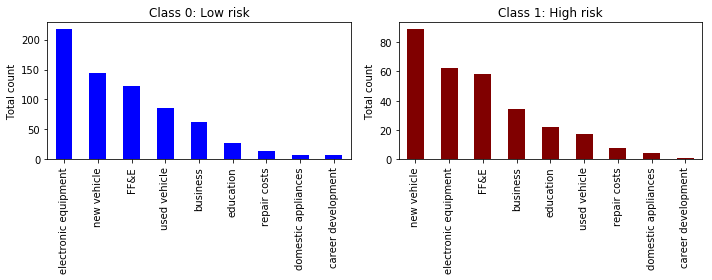

In [54]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
data_purpose_vs_risk_class0["Purpose"].value_counts().plot.bar(color="blue")
plt.ylabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_purpose_vs_risk_class1["Purpose"].value_counts().plot.bar(color="maroon")
plt.ylabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: Given the purpose, applicants can be in class 1 more for certain categories than the other. Purpose column can impact the output.

### EDA 14 - Effect of Principal loan amount on risk

In [55]:
data_loanAmount_vs_risk = data_all[["Principal_loan_amount","high_risk_applicant"]]
data_loanAmount_vs_risk["Principal_loan_amount"].describe()

count    1.000000e+03
mean     3.271258e+06
std      2.822737e+06
min      2.500000e+05
25%      1.365500e+06
50%      2.319500e+06
75%      3.972250e+06
max      1.842400e+07
Name: Principal_loan_amount, dtype: float64

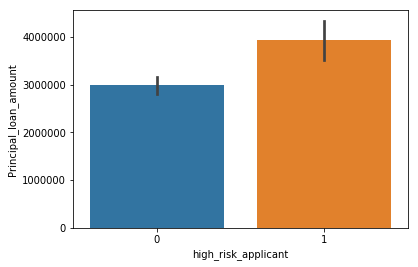

In [56]:
sns.barplot(x='high_risk_applicant', y='Principal_loan_amount',data=data_loanAmount_vs_risk)

#### Observation: Applicants in class 1 on an average take loan of larger amounts than those in class 0.

In [57]:
data_loanAmount_vs_risk_class0 = data_loanAmount_vs_risk.loc[data_loanAmount_vs_risk["high_risk_applicant"]==0]
data_loanAmount_vs_risk_class0["Principal_loan_amount"].describe()

count    7.000000e+02
mean     2.985457e+06
std      2.401472e+06
min      2.500000e+05
25%      1.375500e+06
50%      2.244000e+06
75%      3.634750e+06
max      1.585700e+07
Name: Principal_loan_amount, dtype: float64

In [58]:
data_loanAmount_vs_risk_class1 = data_loanAmount_vs_risk.loc[data_loanAmount_vs_risk["high_risk_applicant"]==1]
data_loanAmount_vs_risk_class1["Principal_loan_amount"].describe()

count    3.000000e+02
mean     3.938127e+06
std      3.535819e+06
min      4.330000e+05
25%      1.352500e+06
50%      2.574500e+06
75%      5.141500e+06
max      1.842400e+07
Name: Principal_loan_amount, dtype: float64

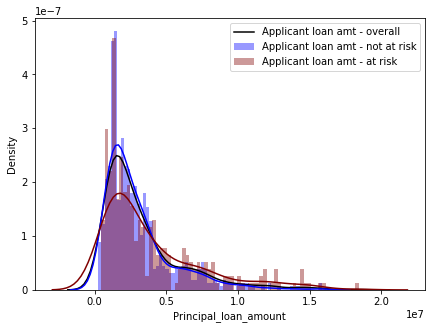

In [59]:
plt.figure(figsize=(7,5))
sns.distplot(data_loanAmount_vs_risk["Principal_loan_amount"], bins=70, color="black",hist=False, label="Applicant loan amt - overall")
sns.distplot(data_loanAmount_vs_risk_class0["Principal_loan_amount"],bins=70, color="blue", label="Applicant loan amt - not at risk")
sns.distplot(data_loanAmount_vs_risk_class1["Principal_loan_amount"],bins=70, color="maroon", label="Applicant loan amt - at risk")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Observation: As loan amount increases, chance of being in class 1 increases. 

### EDA 15 - Effect of EMI on risk

In [60]:
data_EMI_vs_risk = data_all[["EMI_rate_in_percentage_of_disposable_income","high_risk_applicant"]]
data_EMI_vs_risk["EMI_rate_in_percentage_of_disposable_income"].describe()

count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EMI_rate_in_percentage_of_disposable_income, dtype: float64

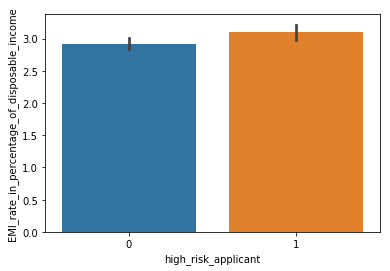

In [61]:
sns.barplot(x='high_risk_applicant', y='EMI_rate_in_percentage_of_disposable_income',data=data_EMI_vs_risk)

#### Observation: Applicants in class 1 have slightly higher EMI rate than those belonging to class 0. EMI rate has an impact on being assigned to a particualr class.

In [62]:
data_EMI_vs_risk_class0 = data_EMI_vs_risk.loc[data_EMI_vs_risk["high_risk_applicant"]==0]
data_EMI_vs_risk_class0["EMI_rate_in_percentage_of_disposable_income"].describe()

count    700.000000
mean       2.920000
std        1.128078
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: EMI_rate_in_percentage_of_disposable_income, dtype: float64

In [63]:
data_EMI_vs_risk_class1 = data_EMI_vs_risk.loc[data_EMI_vs_risk["high_risk_applicant"]==1]
data_EMI_vs_risk_class1["EMI_rate_in_percentage_of_disposable_income"].describe()

count    300.000000
mean       3.096667
std        1.088395
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: EMI_rate_in_percentage_of_disposable_income, dtype: float64

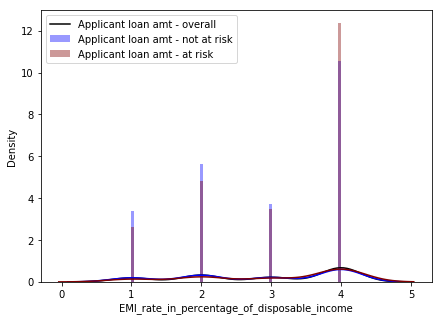

In [64]:
plt.figure(figsize=(7,5))
sns.distplot(data_EMI_vs_risk["EMI_rate_in_percentage_of_disposable_income"], bins=70, color="black",hist=False, label="Applicant loan amt - overall")
sns.distplot(data_EMI_vs_risk_class0["EMI_rate_in_percentage_of_disposable_income"],bins=70, color="blue", label="Applicant loan amt - not at risk")
sns.distplot(data_EMI_vs_risk_class1["EMI_rate_in_percentage_of_disposable_income"],bins=70, color="maroon", label="Applicant loan amt - at risk")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Observation: More applicants for EMI rate 4 belong to class 1. 

### EDA 16 - Effect of Property on risk

In [65]:
data_property_vs_risk = data_all[["Property","high_risk_applicant"]]
data_property_vs_risk["Property"].value_counts()

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

In [66]:
data_property_vs_risk_class0 = data_property_vs_risk.loc[data_property_vs_risk["high_risk_applicant"]==0]
data_property_vs_risk_class0["Property"].value_counts()

car or other                                         230
real estate                                          222
building society savings agreement/life insurance    161
Name: Property, dtype: int64

In [67]:
data_property_vs_risk_class1 = data_property_vs_risk.loc[data_property_vs_risk["high_risk_applicant"]==1]
data_property_vs_risk_class1["Property"].value_counts()

car or other                                         102
building society savings agreement/life insurance     71
real estate                                           60
Name: Property, dtype: int64

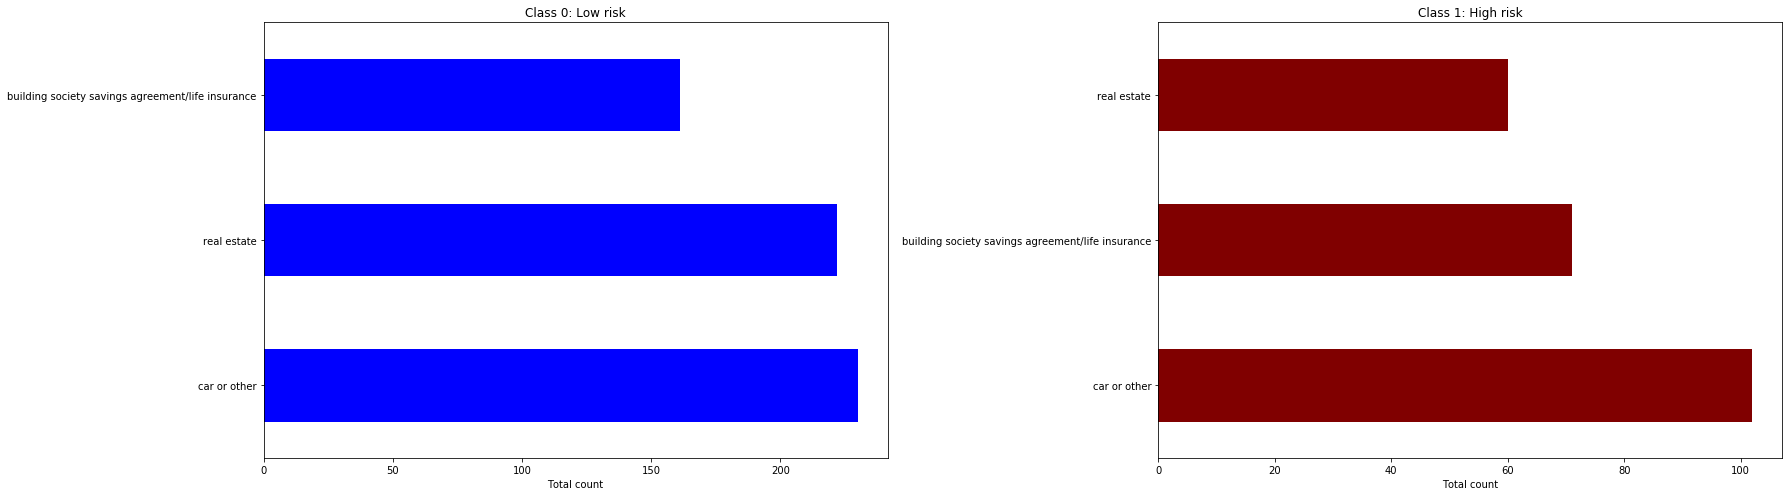

In [68]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
data_property_vs_risk_class0["Property"].value_counts().plot.barh(color="blue")
plt.xlabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_property_vs_risk_class1["Property"].value_counts().plot.barh(color="maroon")
plt.xlabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: ~22% applicants with real estate belong to class 1, ~31% applicants from each other group belong to class 1. Property may have an impact on the output variable.

### EDA 17 - Effect of Has_coapplicant on risk

In [69]:
data_co_vs_risk = data_all[["Has_coapplicant","high_risk_applicant"]]
data_co_vs_risk["Has_coapplicant"].value_counts()

0    959
1     41
Name: Has_coapplicant, dtype: int64

#### Observation: This column has very low variance and 95% of the values are same, thus will not impact the output.

### EDA 18 - Effect of Guarantor on risk

In [70]:
data_guarantor_vs_risk = data_all[["Has_guarantor","high_risk_applicant"]]
data_guarantor_vs_risk["Has_guarantor"].value_counts()

0    948
1     52
Name: Has_guarantor, dtype: int64

#### Observation: This column has very low variance and 94% of the values are same, thus will not impact the output.

### EDA 19 - Effect of Number of existing loans on risk

In [71]:
data_exisitngLoans_vs_risk = data_all[["Number_of_existing_loans_at_this_bank","high_risk_applicant"]]
data_exisitngLoans_vs_risk["Number_of_existing_loans_at_this_bank"].describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Number_of_existing_loans_at_this_bank, dtype: float64

In [72]:
data_exisitngLoans_vs_risk["Number_of_existing_loans_at_this_bank"].value_counts()

1    633
2    333
3     28
4      6
Name: Number_of_existing_loans_at_this_bank, dtype: int64

In [73]:
data_exisitngLoans_vs_risk_class0 = data_exisitngLoans_vs_risk.loc[data_exisitngLoans_vs_risk["high_risk_applicant"]==0]
data_exisitngLoans_vs_risk_class0["Number_of_existing_loans_at_this_bank"].value_counts()

1    433
2    241
3     22
4      4
Name: Number_of_existing_loans_at_this_bank, dtype: int64

In [74]:
data_exisitngLoans_vs_risk_class1 = data_exisitngLoans_vs_risk.loc[data_exisitngLoans_vs_risk["high_risk_applicant"]==1]
data_exisitngLoans_vs_risk_class1["Number_of_existing_loans_at_this_bank"].value_counts()

1    200
2     92
3      6
4      2
Name: Number_of_existing_loans_at_this_bank, dtype: int64

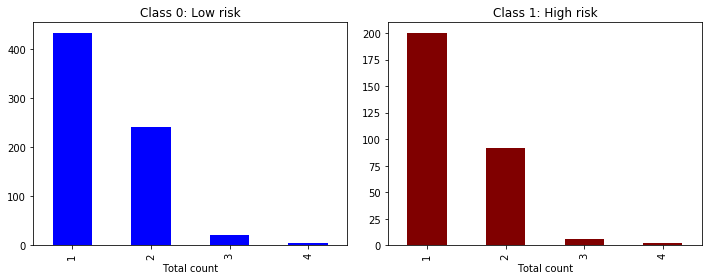

In [75]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
data_exisitngLoans_vs_risk_class0["Number_of_existing_loans_at_this_bank"].value_counts().plot.bar(color="blue")
plt.xlabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_exisitngLoans_vs_risk_class1["Number_of_existing_loans_at_this_bank"].value_counts().plot.bar(color="maroon")
plt.xlabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation:  Ceratin % of applicants from each group belong to class 1. This may have an impact on the output.

### EDA 20 - Effect of Loan_history on risk

In [76]:
data_history_vs_risk = data_all[["Loan_history","high_risk_applicant"]]
data_history_vs_risk["Loan_history"].value_counts()

existing loans paid back duly till now     530
critical/pending loans at other banks      293
delay in paying off loans in the past       88
all loans at this bank paid back duly       49
no loans taken/all loans paid back duly     40
Name: Loan_history, dtype: int64

In [77]:
data_history_vs_risk_class0 = data_history_vs_risk.loc[data_history_vs_risk["high_risk_applicant"]==0]
data_history_vs_risk_class0["Loan_history"].value_counts()

existing loans paid back duly till now     361
critical/pending loans at other banks      243
delay in paying off loans in the past       60
all loans at this bank paid back duly       21
no loans taken/all loans paid back duly     15
Name: Loan_history, dtype: int64

In [78]:
data_history_vs_risk_class1 = data_history_vs_risk.loc[data_history_vs_risk["high_risk_applicant"]==1]
data_history_vs_risk_class1["Loan_history"].value_counts()

existing loans paid back duly till now     169
critical/pending loans at other banks       50
delay in paying off loans in the past       28
all loans at this bank paid back duly       28
no loans taken/all loans paid back duly     25
Name: Loan_history, dtype: int64

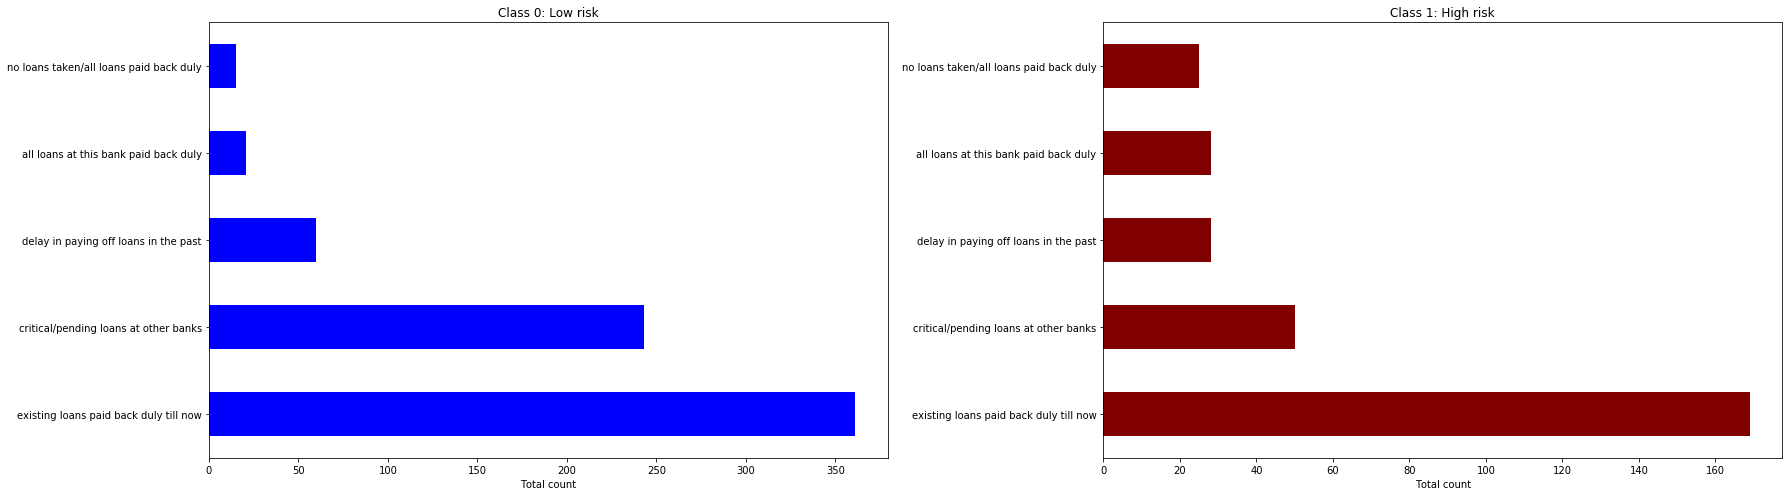

In [79]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
data_history_vs_risk_class0["Loan_history"].value_counts().plot.barh(color="blue")
plt.xlabel("Total count")
plt.title("Class 0: Low risk")

plt.subplot(1, 2, 2)
data_history_vs_risk_class1["Loan_history"].value_counts().plot.barh(color="maroon")
plt.xlabel("Total count")
plt.title("Class 1: High risk")

plt.tight_layout()
plt.show()

#### Observation: For class 1: existing loans paid back duly till now: 169 (169/530 ~ 32%) ; critical/pending loans at other banks:  50 (50/293 ~ 17%); all loans at this bank paid back duly:  28 (28/49 ~ 58%); delay in paying off loans in the past:  28 (28/88 ~ 32%) ; no loans taken/all loans paid back duly: 25 (25/40 ~ 63%)


#### From the EDA the following columns can be dropped:
1. Marital status - the status categories are ambiguous 
2. Number of dependents - Variance is very low in this column; 85% of the column has only one value
3. Number of years at current residence - Variance is very low in this column; On an avergae number of years 
is same for both the classes, hence will not contribute to learning. 
4. Has_been_employed_for_at_least
5. Has_been_employed_for_at_most - These two are ambiguous, has NULL values and redundant since there is already emplyment status
6. Foreign worker
7. Co-applicant
8. Guarantor - Variance is very low in these columns; 95% of the column has only one value

In [80]:
data_afterEDA = data_all.drop(['applicant_id','Marital_status', 'Number_of_dependents', 'Years_at_current_residence', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most','Foreign_worker','loan_application_id','Has_coapplicant','Has_guarantor'], axis=1)
data_afterEDA.info()
data_afterEDA.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
Primary_applicant_age_in_years                 1000 non-null int64
Gender                                         1000 non-null object
Housing                                        1000 non-null object
Employment_status                              1000 non-null object
Savings_account_balance                        817 non-null object
Months_loan_taken_for                          1000 non-null int64
Purpose                                        988 non-null object
Principal_loan_amount                          1000 non-null int64
EMI_rate_in_percentage_of_disposable_income    1000 non-null int64
Property                                       846 non-null object
Number_of_existing_loans_at_this_bank          1000 non-null int64
Loan_history                                   1000 non-null object
high_risk_applicant                            1000 non-null int64
dtypes: int64(6), o

### For missing categorical variables:
1. If number of missing values is less, replace using Mode
2. If number of missing values is high, replace using new category Unknwown

In [81]:
data_afterEDA["Purpose"].fillna('electronic equipment', inplace=True)
data_afterEDA["Savings_account_balance"].fillna('U1', inplace=True)
data_afterEDA["Property"].fillna('U2', inplace=True)

### Encode categorical variables:
1. If categorical variables are ordinal, use idea of label encoder
2. If categorical variables are not ordinal, use idea of one hot encoder

In [82]:
data_afterEDA['Gender'].replace(['male','female'],[0,1],inplace=True)
data_afterEDA['Savings_account_balance'].replace(['U1','Low', 'Medium','High','Very high'],[0,1,3,4,5],inplace=True)
data_afterEDA['Employment_status'].replace(['unskilled - resident','unemployed / unskilled - non-resident', 'skilled employee / official','management / self-employed / highly qualified employee / officer'],[0,1,3,4],inplace=True)

In [83]:
dummy_purpose = pd.get_dummies(data_afterEDA["Purpose"],dtype=int)
dummy_purpose_corr_mat = dummy_purpose.corr()
data_afterEDA = pd.concat([data_afterEDA,dummy_purpose],axis=1)
data_afterEDA.drop(columns=['Purpose'],axis=1,inplace=True)

dummy_property = pd.get_dummies(data_afterEDA["Property"],dtype=int)
dummy_property_corr_mat = dummy_property.corr()
data_afterEDA = pd.concat([data_afterEDA,dummy_property],axis=1)
data_afterEDA.drop(columns=['Property'],axis=1,inplace=True)

dummy_housing = pd.get_dummies(data_afterEDA["Housing"],dtype=int)
dummy_housing_corr_mat = dummy_housing.corr()
data_afterEDA = pd.concat([data_afterEDA,dummy_housing],axis=1)
data_afterEDA.drop(columns=['Housing'],axis=1,inplace=True)

dummy_loanHist = pd.get_dummies(data_afterEDA["Loan_history"],dtype=int)
dummy_loanHist_corr_mat = dummy_loanHist.corr()
data_afterEDA = pd.concat([data_afterEDA,dummy_loanHist],axis=1)
data_afterEDA.drop(columns=['Loan_history'],axis=1,inplace=True)

### Define feature and target variables; and obtain mututal information of each feature w.r.t. target

In [84]:
features_data = data_afterEDA.drop(['high_risk_applicant'], axis=1)
target_data = pd.DataFrame(data_afterEDA['high_risk_applicant'])

features_data_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(features_data))

MI = mutual_info_classif(np.array(features_data_scaled), np.array(data_afterEDA['high_risk_applicant']), discrete_features=False)
print("Mutual Information:\n",MI)

Mutual Information:
 [0.00712989 0.         0.         0.01853588 0.0322349  0.01174572
 0.00334271 0.         0.02299725 0.00610438 0.         0.
 0.00115804 0.         0.00898169 0.00163511 0.         0.00773347
 0.         0.01076919 0.01204261 0.00932981 0.01401288 0.00208211
 0.03461835 0.02937116 0.         0.01017399 0.01572109]


#### Observation: Mututal information computes dependency between variables (here, dependency of target on fetaures). Higher values mean higher dependency. The score computation is based on entropy estimation.                                                                               The above mutual inforamtion scores are low; Imbalanced class can be one reason. 

### Use oversampling to overcome class imbalance

In [85]:
smote = SMOTE(k_neighbors=5, random_state=999)
X, Y = smote.fit_resample(features_data, target_data)

X_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X))

MI = mutual_info_classif(np.array(X_scaled), np.array(Y['high_risk_applicant']), discrete_features=False)
print("Mutual Information:\n",MI)

Mutual Information:
 [0.01142473 0.00599041 0.02291213 0.03723567 0.08825438 0.11232405
 0.02306935 0.03059171 0.00068737 0.         0.00921602 0.00364705
 0.         0.0494254  0.         0.         0.03008425 0.
 0.00761399 0.004196   0.034054   0.00189251 0.05380165 0.01157556
 0.         0.05568862 0.         0.         0.02745008]


#### Observation: Mutual inforamtion score improves for majority of the features after oversampling. 

### Prepare data for modelling

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=999)

train_mean = x_train.mean()
train_std = x_train.std()
x_train_scaled = (x_train - train_mean)/train_std
x_test_scaled = (x_test - train_mean)/train_std

### Modelling using Logistic Regression

In [87]:
lr = LogisticRegression()
print("Cross validation scores:\n",cross_val_score(lr, x_train_scaled, y_train, cv=10))

lr.fit(x_train_scaled, y_train)
pred_vals = lr.predict(x_test_scaled)

pred_vals_df = pd.DataFrame(pred_vals)

Cross validation scores:
 [0.79464286 0.79464286 0.85714286 0.72321429 0.79464286 0.75892857
 0.75892857 0.83928571 0.78571429 0.76785714]


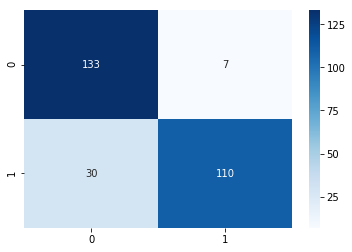

In [88]:
conf = confusion_matrix(y_test,pred_vals_df)
label = [0,1]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label,cmap='Blues', fmt='g')
plt.show()

In [89]:
print(classification_report(y_test,pred_vals_df, labels=label))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       140
           1       0.94      0.79      0.86       140

    accuracy                           0.87       280
   macro avg       0.88      0.87      0.87       280
weighted avg       0.88      0.87      0.87       280



AUC score:  0.8678571428571428


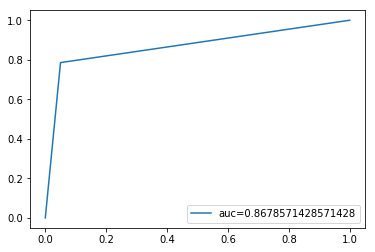

In [90]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_vals_df)
auc = metrics.roc_auc_score(y_test, pred_vals_df)
print("AUC score: ",auc)
plt.plot(fpr,tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Obseravtion: A basic linear classifier is used for classification. Note: The same classifier performs worse without oversampling. Less than 50% of the cases in class 1 got correctly classified using the original dataset. 

### Modelling using SVM

In [91]:
svm_c = svm.SVC(kernel='rbf', gamma=0.011, C = 65) 
print("Cross validation scores:\n",cross_val_score(svm_c, x_train_scaled, y_train, cv=10))

svm_c.fit(x_train_scaled, y_train)
pred_vals = svm_c.predict(x_test_scaled)

pred_vals_df = pd.DataFrame(pred_vals)

Cross validation scores:
 [0.73214286 0.82142857 0.76785714 0.76785714 0.79464286 0.76785714
 0.83035714 0.82142857 0.73214286 0.71428571]


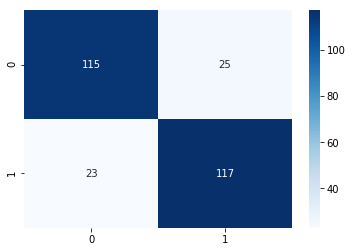

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       140
           1       0.82      0.84      0.83       140

    accuracy                           0.83       280
   macro avg       0.83      0.83      0.83       280
weighted avg       0.83      0.83      0.83       280



In [92]:
conf = confusion_matrix(y_test,pred_vals_df)
label = [0,1]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label,cmap='Blues', fmt='g')
plt.show()

print(classification_report(y_test,pred_vals_df, labels=label))

AUC score:  0.8285714285714286


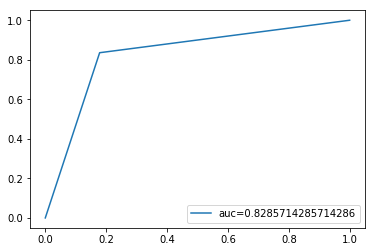

In [93]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_vals_df)
auc = metrics.roc_auc_score(y_test, pred_vals_df)
print("AUC score: ",auc)
plt.plot(fpr,tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Observation: Since it is more important to have fewer misclassifications for class 1, SVM has been used to address the same. The data may not be linearly separable. SVM handles that in a higher dimension. Though overall accuracy drops compared to Logistic Regression, but prediction for class 1 is better. 

### Ensemble Modelling using Random Forests

In [94]:
rf = RandomForestClassifier(n_estimators=77,max_depth=25, min_samples_split=4, min_samples_leaf=2) 
print("Cross validation scores:\n",cross_val_score(rf, x_train_scaled, y_train, cv=10))

rf.fit(x_train_scaled, y_train)
pred_vals = rf.predict(x_test_scaled)

pred_vals_df = pd.DataFrame(pred_vals)

Cross validation scores:
 [0.80357143 0.79464286 0.83928571 0.75       0.78571429 0.73214286
 0.84821429 0.83035714 0.75       0.79464286]


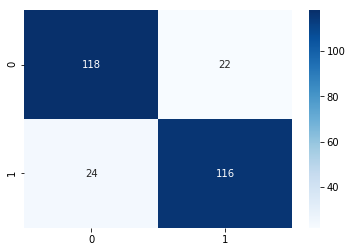

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       140
           1       0.84      0.83      0.83       140

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280



In [95]:
conf = confusion_matrix(y_test,pred_vals_df)
label = [0,1]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label,cmap='Blues', fmt='g')
plt.show()

print(classification_report(y_test,pred_vals_df, labels=label))

#### Observation: To improve the prediction of class 1 further, ensembled model is used. This model performs better than SVM, barring one extra misclassification than SVM.

AUC score:  0.8357142857142857


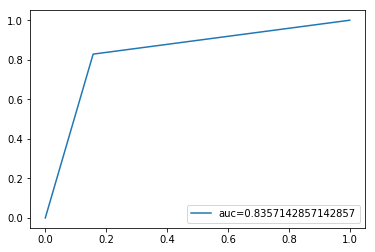

In [96]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_vals_df)
auc = metrics.roc_auc_score(y_test, pred_vals_df)
print("AUC score: ",auc)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random forest model acts as a tradeoff between Logistic Regression and SVM. Thus, Random forest model seems to be the best choice for this data. Note: Each model leaves a scope of improvement under parameter-tuning, accurate feature selection and more number of training samples. 